### Objective: Can we predict the credit card approval of a customer given their banking and personal measurements?

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')    # To suppress all the warnings in the notebook.
pd.set_option('mode.chained_assignment', None) # To suppress pandas warnings.
np.set_printoptions(precision=4) # To display values only upto four decimal places.

In [46]:
colnames=['Gender', 'Age', 'Debt','Married','BankCustomer','EducationLevel', 'Ethnicity', 
    'YearsEmployed', 'PriorDefault','Employed', 'CreditScore','DriversLicense', 'Citizen',
    'ZipCode','Income','Approved']
data=pd.read_csv('D:\Credit card approval prediction\crx.data', usecols = ['YearsEmployed', 'Debt', 'CreditScore', 'PriorDefault', 'Income', 'Approved'],
                 names=colnames, header=None)
data.sample(5)

,Debt,YearsEmployed,PriorDefault,CreditScore,Income,Approved
469,4.085,0.415,f,0,0,-
574,10.000,1.000,t,4,1465,+
597,6.000,2.500,t,3,918,+
74,7.000,1.625,f,0,2,-
571,3.000,1.085,t,8,1,+


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 6 columns):
Debt             690 non-null float64
YearsEmployed    690 non-null float64
PriorDefault     690 non-null object
CreditScore      690 non-null int64
Income           690 non-null int64
Approved         690 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 32.4+ KB


In [48]:
# A simple and intuitive way to convert the feature to 0's and 1's might be
data['Approved'] = data['Approved'].replace(to_replace = "+", value = 1)
data['Approved'] = data['Approved'].replace(to_replace = "-", value = 0)
Approved= data['Approved'].value_counts()
Approved  # target

0    383
1    307
Name: Approved, dtype: int64

In [49]:
data['PriorDefault'] = data['PriorDefault'].replace(to_replace = "t", value = 1)
data['PriorDefault'] = data['PriorDefault'].replace(to_replace = "f", value = 0)
PriorDefault= data['PriorDefault'].value_counts()
PriorDefault

1    361
0    329
Name: PriorDefault, dtype: int64

In [50]:
# Splitting the data into Train and Test
X=data[data.columns[:-1]] 
y=data['Approved']
X.head(2)

,Debt,YearsEmployed,PriorDefault,CreditScore,Income
0,0.00,1.25,1,1,0
1,4.46,3.04,1,6,560


In [51]:
y.head(2)

0    1
1    1
Name: Approved, dtype: int64

In [52]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [53]:
#Feature scaling: scaling the data to bring all te features to te same level of magnitude
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [54]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
y_pred_class = logreg.predict_proba(X_train)
print('Logreg train roc-auc: {}'.format(roc_auc_score(y_train, y_pred_class[:,1])))
y_pred_class = logreg.predict_proba(X_test)
print('Logreg test roc-auc: {}'.format(roc_auc_score(y_test, y_pred_class[:,1])))

Logreg train roc-auc: 0.9128574030231288
Logreg test roc-auc: 0.929975760840291


In [62]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [63]:
from sklearn.metrics import classification_report
print('classification_report :- ')
print(classification_report(y_test, y_pred_class))

classification_report :- 
              precision    recall  f1-score   support

           0       0.93      0.81      0.86        94
           1       0.80      0.92      0.86        79

    accuracy                           0.86       173
   macro avg       0.86      0.87      0.86       173
weighted avg       0.87      0.86      0.86       173



Text(91.68, 0.5, 'Actual')

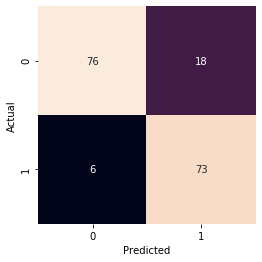

In [64]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred_class)
#print('confusion_matrix',mat)
names = np.unique(y_pred_class)
#Heat map works by correlation. This shows you which variables are correlated to each other 
#from a scale of 1 being the most correlated and -1 is not correlated at all
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [65]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
print('Logreg test set roc-auc:', metrics.roc_auc_score(y_test, y_pred_class))

Logreg test set roc-auc: 0.8662806356046324


### Classification accuracy: percentage of correct predictions

In [66]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.861271676300578


### accuracy that could be achieved by always predicting the most frequent class

In [67]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    94
1    79
Name: Approved, dtype: int64

In [68]:
# calculate the percentage of ones
y_test.mean()

0.45664739884393063

In [69]:
# calculate the percentage of zeros
1 - y_test.mean()

0.5433526011560694

In [70]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.5433526011560694

In [71]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.543353
Name: Approved, dtype: float64

### Comparing the true and predicted response values

In [72]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0]
Pred: [1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0]


### Conclusion:
* Classification accuracy is the easiest classification metric to understand
* But, it does not tell you the underlying distribution of response values
* And, it does not tell you what "types" of errors your classifier is making

# Confusion matrix
Table that describes the performance of a classification model

In [73]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[76 18]
 [ 6 73]]


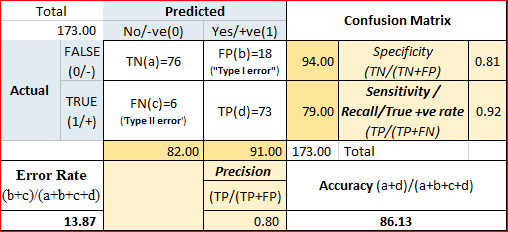

In [74]:
from IPython.display import Image
Image("Con mat.PNG")

### Basic terminology
* True Positives (TP): we correctly predicted that they have Cr. Card Approval
* True Negatives (TN): we correctly predicted that they don't have card approval
* False Positives (FP): we incorrectly predicted that they do have got approval (a "Type I error")
* False Negatives (FN): we incorrectly predicted that they don't have approval (a "Type II error")

In [75]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0]
Pred: [1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0]


In [76]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Metrics computed from a confusion matrix

## Accuracy: Overall, how often is the classifier correct? 
##When the model predicts YES how many times it is correct?

In [77]:
print((TP + TN) / float(TP + TN + FP + FN)*100)
print(metrics.accuracy_score(y_test, y_pred_class)*100)

86.1271676300578
86.1271676300578


### Error Rate: Overall, how often is the classifier incorrect?
Also known as "Misclassification Rate"

In [78]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.13872832369942195
0.138728323699422


### Sensitivity: When the actual value is positive, how often is the prediction correct?
How "sensitive" is the classifier to detecting positive instances?
Also known as "True Positive Rate" or "Recall"

In [79]:
print(TP / float(TP + FN)*100)
print(metrics.recall_score(y_test, y_pred_class)*100)

92.40506329113924
92.40506329113924


### Specificity: When the actual value is negative, how often is the prediction correct?
How "specific" (or "selective") is the classifier in predicting positive instances?

In [80]:
print(TN / float(TN + FP))

0.8085106382978723


### Precision: When a positive value is predicted, how often is the prediction correct?
How "precise" is the classifier when predicting positive instances?

In [81]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.8021978021978022
0.8021978021978022


# ROC Curves and Area Under the Curve (AUC)

* Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?
* Answer: Plot the ROC curve!

In [82]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

AUC: 0.8662806356046324


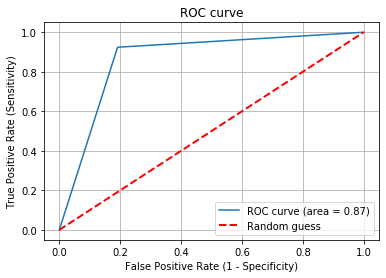

In [83]:
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_class)
auc = metrics.auc(fpr, tpr)
print("AUC:", auc)

plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid()
plt.legend()
plt.show()

* ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context


In [84]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_class))

0.8662806356046324


* AUC is useful as a single number summary of classifier performance.
* If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.
* AUC is useful even when there is high class imbalance (unlike classification accuracy).

In [85]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()


0.9086061773540551

## Confusion matrix advantages:
* *Allows you to calculate a variety of metrics
* *Useful for multi-class problems (more than two response classes)



## ROC/AUC advantages:
* *Does not require you to set a classification threshold
* *Still useful when there is high class imbalance